#*NYC Department of Health: Risk Segmentation Model Approach for Restaurants*
### GWU Business Analytics Practicum: Spring 2024
#### Authors: Emma Hudson, Nada Mashkour, Arnav Chaudhari, Manuel Chavez


# Import Necessary Packages

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [143]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

# Data Cleaning & Exploratory Analysis

Importing the original dataset, from the NYC DOH Open Source data:

https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data

In [144]:
mydf = pd.read_csv("NYC_rest_inspection.csv")

In [145]:
len(mydf)

213679

In [146]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213679 entries, 0 to 213678
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  213679 non-null  int64  
 1   DBA                    212957 non-null  object 
 2   BORO                   213679 non-null  object 
 3   BUILDING               213363 non-null  object 
 4   STREET                 213677 non-null  object 
 5   ZIPCODE                210981 non-null  float64
 6   PHONE                  213677 non-null  object 
 7   CUISINE DESCRIPTION    211150 non-null  object 
 8   INSPECTION DATE        213679 non-null  object 
 9   ACTION                 211150 non-null  object 
 10  VIOLATION CODE         210024 non-null  object 
 11  VIOLATION DESCRIPTION  210024 non-null  object 
 12  CRITICAL FLAG          213679 non-null  object 
 13  SCORE                  203298 non-null  float64
 14  GRADE                  104095 non-nu

In [147]:
mydf.columns = mydf.columns.str.strip()

In [148]:
# removing unnecessary columns
columns_remove=['Community Board','Council District','Census Tract','BIN','BBL','NTA','Location Point1','PHONE']

In [149]:
mydf = mydf.drop(columns=columns_remove)

In [150]:
mydf['INSPECTION DATE'] = pd.to_datetime(mydf['INSPECTION DATE']).dt.date
mydf['RECORD DATE'] = pd.to_datetime(mydf['RECORD DATE']).dt.date

<ipython-input-150-a59cb0cbb149>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mydf['INSPECTION DATE'] = pd.to_datetime(mydf['INSPECTION DATE']).dt.date


In [151]:
# Some rows have a date of '1900.' For the purpose of our future analysis, we will be removing theses rows, as it does not fit in the timeframe of our data.
mydf['INSPECTION DATE'] = pd.to_datetime(mydf['INSPECTION DATE'], errors='coerce')
mydf_filter1 = mydf.loc[mydf['INSPECTION DATE'].dt.year == 1900]

In [152]:
num_rows_filtered = len(mydf_filter1)

print("Number of rows in mydf_filter1:", num_rows_filtered)

Number of rows in mydf_filter1: 0


In [153]:
empty_columns2 = mydf_filter1.columns[mydf_filter1.isnull().all()]
print(empty_columns2)

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude',
       'Longitude'],
      dtype='object')


In [154]:
mydf = mydf[mydf['INSPECTION DATE'].dt.year != 1900]

In [155]:
mydf['VIOLATION CODE'].unique()

array([nan, '02B', '09B', '10J', '04A', '22F', '04M', '04L', '06F',
       '19-10', '09C', '18F', '05A', '20F', '04K', '10H', '09E', '02I',
       '10C', '15-21', '10E', '03F', '15-01', '15F6', '03I', '20-06',
       '20-08', '08A', '06D', '10B', '06C', '10F', '09A', '02G', '06B',
       '04C', '10D', '08B', '08C', '04J', '10G', '06A', '02H', '05H',
       '20-04', '04N', '04H', '06E', '05D', '05F', '28-03', '22A',
       '18-11', '28-06', '02F', '20A', '20-01', '28-01', '20D', '10A',
       '10I', '19-04', '22C', '04O', '02C', '19-05', '18-08', '05C',
       '16-04', '16-03', '06G', '19-06', '03B', '19-07', '16-02', '15-27',
       '03A', '28-04', '04E', '22G', '16B', '02A', '19-11', '04D', '09D',
       '22E', '15-42', '28-05', '16E', '1.50E+03', '16D', '16-06', '18G',
       '15-37', '18-12', '1.50E+04', '16C', '05E', '03C', '18-01',
       '15-36', '06H', '04F', '16A', '20E', '15F7', '16-01', '03E',
       '20-05', '05B', '18-02', '04B', '15-22', '18-13', '18D', '20-07',
       '18

In [156]:
rows_with_empty_CAMIS = mydf[mydf['CAMIS'].isna()]
print(rows_with_empty_CAMIS)

Empty DataFrame
Columns: [CAMIS, DBA, BORO, BUILDING, STREET, ZIPCODE, CUISINE DESCRIPTION, INSPECTION DATE, ACTION, VIOLATION CODE, VIOLATION DESCRIPTION, CRITICAL FLAG, SCORE, GRADE, GRADE DATE, RECORD DATE, INSPECTION TYPE, Latitude, Longitude]
Index: []


Rows where DBA (restaurant name) is empty:

In [157]:
rows_with_empty_DBA = mydf[mydf['DBA'].isna()]

 We will check in this dataset the unique values for __'Violation Description'__

In [158]:
rows_empty_VCODE_1 = mydf[mydf['VIOLATION CODE'].isna()]
rows_empty_VCODE_1['VIOLATION DESCRIPTION'].unique()

array([nan], dtype=object)

We realize that all the values are empty in Violation Description column, now we will move to __Score__

Checking the unique values for __Score__

In [159]:
rows_empty_VCODE_1['SCORE'].unique()

array([nan,  0.])

In [160]:
rows_empty_VCODE_1['GRADE'].unique()

array([nan, 'A', 'N', 'P', 'Z', 'C'], dtype=object)

In [161]:
rows_empty_VCODE_2 = rows_empty_VCODE_1[rows_empty_VCODE_1['SCORE'].isna()]
len(rows_empty_VCODE_2)

3029

In [162]:
rows_empty_VCODE_2['VIOLATION CODE'].unique()

array([nan], dtype=object)

## Preparing dataset for modeling

In [163]:
mydf = mydf[(mydf['GRADE'].notna()) & (mydf['GRADE'] != 0)]

In [164]:
# Looking at the letter grades

In [165]:
mydf = mydf[mydf['GRADE'].isin(['A', 'B','C'])]

In [166]:
mydf = mydf[mydf['VIOLATION CODE'].notna()]

We verify that we do not have empty rows:

In [167]:
selected_columns = ['VIOLATION CODE', 'GRADE','GRADE DATE']  # Replace with your selected columns

# Check for empty values in selected columns
empty_rows_exist = mydf[selected_columns].isna().any(axis=1).any()
empty_rows_exist

False

In [168]:
# We include a new key , in order to identify a inspection instead , and merging later the violations
mydf['GRADE DATE'] = pd.to_datetime(mydf['GRADE DATE'])
mydf['KEY'] = mydf['CAMIS'].astype(str) + '-' + mydf['GRADE DATE'].dt.strftime('%Y%m%d')

<ipython-input-168-2a944987d23b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mydf['GRADE DATE'] = pd.to_datetime(mydf['GRADE DATE'])


In [169]:
unique_violations = mydf['VIOLATION CODE'].unique()
unique_violations

array(['10J', '09B', '02B', '06F', '04M', '09C', '09E', '02I', '10C',
       '04A', '10E', '04L', '04K', '10H', '06D', '10B', '06C', '08A',
       '10F', '09A', '02G', '10D', '08B', '08C', '06A', '04N', '05F',
       '04J', '10G', '04C', '04H', '05D', '10A', '10I', '04O', '06B',
       '28-06', '02H', '06E', '03A', '02C', '03B', '28-05', '02A', '22G',
       '05H', '03C', '06H', '04E', '03I', '05E', '05C', '04F', '04B',
       '06G', '05B', '04D', '02D', '04P', '05A', '09D', '02F', '28-07',
       '03E', '22F', '03F', '06I', '03D', '03G', '18-11', '20-06',
       '16-03', '20-04', '04I'], dtype=object)

In [170]:
unique_grades = mydf['GRADE'].unique()
unique_grades

array(['A', 'B', 'C'], dtype=object)

In [171]:
column_to_move = 'KEY'

index_of_column = mydf.columns.get_loc(column_to_move)

mydf.insert(0, column_to_move, mydf.pop(column_to_move))

In [172]:
violation_columns = [col for col in mydf.columns if 'VIOLATION' in col]

In [173]:
mydf['CUISINE DESCRIPTION'].unique()

array(['American', 'Chinese', 'Japanese', 'Pizza', 'Mediterranean',
       'African', 'Hotdogs/Pretzels', 'Chicken', 'Coffee/Tea', 'Italian',
       'Caribbean', 'Mexican', 'Donuts', 'Tex-Mex', 'Soul Food', 'Vegan',
       'Vegetarian', 'Sandwiches', 'Seafood', 'Spanish',
       'Bakery Products/Desserts', 'Other', 'Hamburgers',
       'Latin American', 'Asian/Asian Fusion', 'Indian', 'Jewish/Kosher',
       'Bagels/Pretzels', 'Thai', 'Middle Eastern', 'Turkish', 'Peruvian',
       'Brazilian', 'Hawaiian', 'Salads',
       'Juice, Smoothies, Fruit Salads', 'Sandwiches/Salads/Mixed Buffet',
       'Frozen Desserts', 'Barbecue', 'Korean', 'Greek', 'Creole',
       'Hotdogs', 'Russian', 'Steakhouse', 'French', 'Eastern European',
       'Southeast Asian', 'Chinese/Japanese', 'New French', 'Continental',
       'German', 'Bottled Beverages', 'Tapas', 'Soups/Salads/Sandwiches',
       'Irish', 'Bangladeshi', 'Filipino', 'Fusion', 'Australian',
       'New American', 'Not Listed/Not Applicab

In [174]:
unique_violations = ['10J', '09B', '02B', '06F', '04M', '09C', '09E', '02I', '10C', '04A', '10E', '04L', '04K', '10H', '06D', '10B', '06C', '10F',
                     '09A', '08A', '02G', '10D', '08B', '08C', '06A', '04N', '04J', '10G', '04C', '04H', '05D', '10A', '10I', '06B', '02H', '06E',
                     '03A', '02C', '28-06', '28-05', '02A', '22G', '05F', '05H', '03C', '04E', '03I', '04O', '05C', '03B', '04B', '06G', '05B', '04D',
                     '02D', '04F', '04P', '05A', '02F', '22F', '03F', '03E', '05E', '03D', '03G', '18-11', '28-07', '09D', '04I']

# Create dummy variables for all unique 'VIOLATION CODE'
violation_dummies = pd.get_dummies(mydf['VIOLATION CODE']).astype(int)
violation_dummies2 = pd.get_dummies(mydf['BORO']).astype(int)
violation_dummies3 = pd.get_dummies(mydf['CUISINE DESCRIPTION']).astype(int)

# Reverse the dummy variables to indicate whether a violation code occurred or not
violation_occurred = violation_dummies.groupby(mydf['KEY']).apply(lambda x: x.max(axis=0)).reset_index(drop=True)
violation_occurred2 = violation_dummies2.groupby(mydf['KEY']).apply(lambda x: x.max(axis=0)).reset_index(drop=True)
violation_occurred3 = violation_dummies3.groupby(mydf['KEY']).apply(lambda x: x.max(axis=0)).reset_index(drop=True)

grouped_df = mydf.groupby('KEY').agg({
    'GRADE': 'first',
    'SCORE': 'max',
    'INSPECTION DATE':'first',
    'CAMIS':'first',
    'DBA':'first',
    'Latitude':'first',
    'Longitude':'first',
}).reset_index()

final_df = pd.concat([grouped_df, violation_occurred,violation_occurred2,violation_occurred3], axis=1)

In [175]:
unique_boros=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']

In [176]:
unique_boros

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [177]:
unique_cuisine=mydf['CUISINE DESCRIPTION'].unique().tolist()

# First Round of Clustering

In [178]:
pip install yellowbrick

In [179]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import sys
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

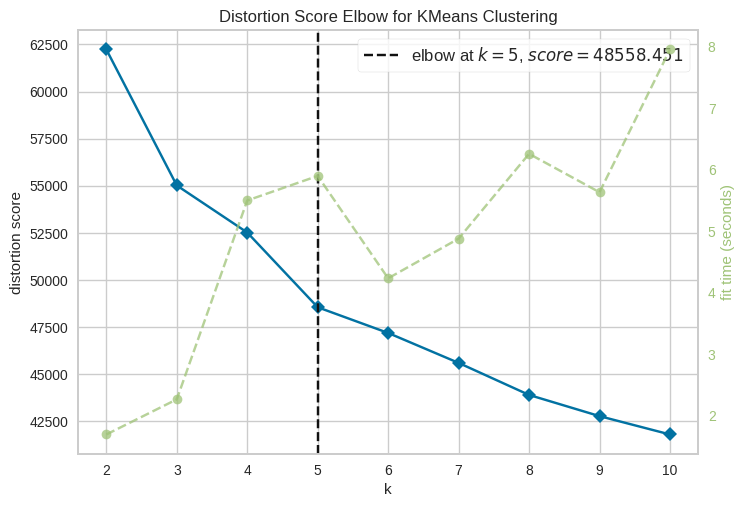

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [180]:
X = final_df[unique_violations]
Elbow_M = KElbowVisualizer(KMeans(),n_clusters = 4, k=10)
Elbow_M.fit(X)
Elbow_M.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

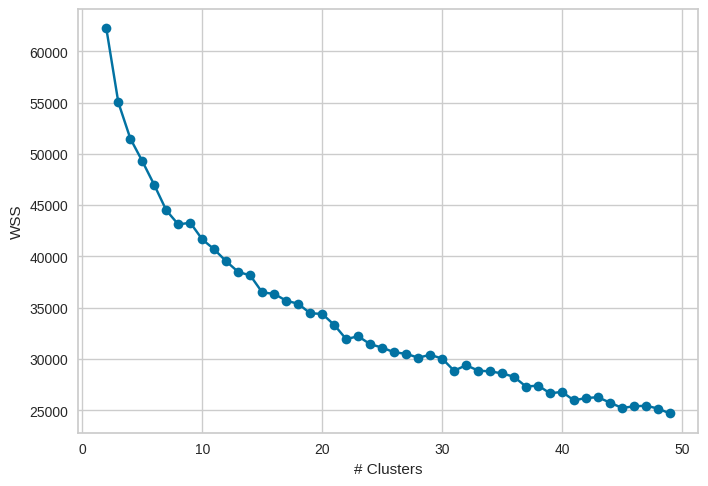

In [181]:
from sklearn.cluster import KMeans

cluster_range = range(2,50)
cluster_wss = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(X)
    cluster_wss.append(clusters.inertia_)

plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

In [182]:
final_df['INSPECTION DATE'] = pd.to_datetime(final_df['INSPECTION DATE'])

final_df['Year'] = final_df['INSPECTION DATE'].dt.year

count_per_year = final_df['Year'].value_counts().sort_index(ascending=True)

cumulative_count = count_per_year.cumsum()
total_count = cumulative_count.max()
cumulative_percentage = cumulative_count / total_count * 100


result_df = pd.DataFrame({'Count': count_per_year,'Cumulative Count': cumulative_count,'Cumulative Percentage': cumulative_percentage})

print("Number of rows per year (ascending order):")
print(result_df)

Number of rows per year (ascending order):
      Count  Cumulative Count  Cumulative Percentage
Year                                                
2015      6                 6               0.016028
2016    129               135               0.360635
2017    374               509               1.359726
2018    502              1011               2.700753
2019   1388              2399               6.408612
2020   1322              3721               9.940161
2021   3313              7034              18.790404
2022  14775             21809              58.259871
2023  14941             36750              98.172784
2024    684             37434             100.000000


We are working with an approx split of 60-40 , considering the split by Date since our data has a time component.

In [183]:
filter_test = final_df[final_df['Year'].isin([2023, 2024])]

In [184]:
filter_train = final_df[final_df['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]

In [185]:
pip install scikit-learn-extra

In [186]:
X_train=filter_train[unique_violations]
X_test=filter_test[unique_violations]
y_train=filter_train['SCORE']
y_test=filter_test['SCORE']

In [187]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

def calculate_median(X):
    return np.median(X, axis=0)

def median_distance(X, medians):
    return np.linalg.norm(X - medians, ord=1, axis=1)


def kmedians_fit(X, n_clusters, random_state=0, max_iter=300):

    kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=random_state, max_iter=max_iter)
    kmeans.fit(X)

    # Calculate the median for each cluster
    cluster_medians = []
    for i in range(n_clusters):
        cluster_data = X[kmeans.labels_ == i]
        median = calculate_median(cluster_data)
        cluster_medians.append(median)

    # Return the cluster labels and medians
    return kmeans.labels_, np.array(cluster_medians)

train_clusters, train_medians = kmedians_fit(X_train.values, n_clusters=4)

test_distances = np.array([median_distance(X_test.values, train_medians[i]) for i in range(4)])
test_clusters = np.argmin(test_distances, axis=0)

# Create a DataFrame to store test data and their predicted clusters
test_cluster_df = pd.DataFrame({'Test Data': y_test, 'Cluster': test_clusters})

# Calculate the average score by cluster
average_score_by_cluster = test_cluster_df.groupby('Cluster')['Test Data'].mean()
print(average_score_by_cluster)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0    17.648365
1    16.753309
2    10.381439
3     9.500982
Name: Test Data, dtype: float64


In [188]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_test, test_clusters)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18648685066459944


In [189]:
filter_train['Cluster'] = train_clusters
filter_test['Cluster'] = test_clusters

filter_train['Data Source'] = 'Training'
filter_test['Data Source'] = 'Test'

combined_data = pd.concat([filter_train, filter_test], axis=0)

<ipython-input-189-6546f980c730>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_train['Cluster'] = train_clusters
<ipython-input-189-6546f980c730>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_test['Cluster'] = test_clusters
<ipython-input-189-6546f980c730>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [190]:
cluster_counts = combined_data['Cluster'].value_counts()
print(cluster_counts)

Cluster
3    16217
2    12320
1     4974
0     3923
Name: count, dtype: int64


##__CLUSTER 0__

In [191]:
cluster_0 = combined_data[combined_data['Cluster'] == 0]

In [192]:
cluster_0.to_csv('cluster0.csv')

In [193]:
sum_of_unique_violations = cluster_0[unique_violations].sum()

sum_table = pd.DataFrame(sum_of_unique_violations, columns=['Sum'])

sum_table_sorted = sum_table.sort_values(by='Sum', ascending=False)

print(sum_table_sorted)

        Sum
08A    3732
04N    3617
10F    1019
04L     744
10B     603
...     ...
03D       0
03G       0
18-11     0
04B       0
04I       0

[69 rows x 1 columns]


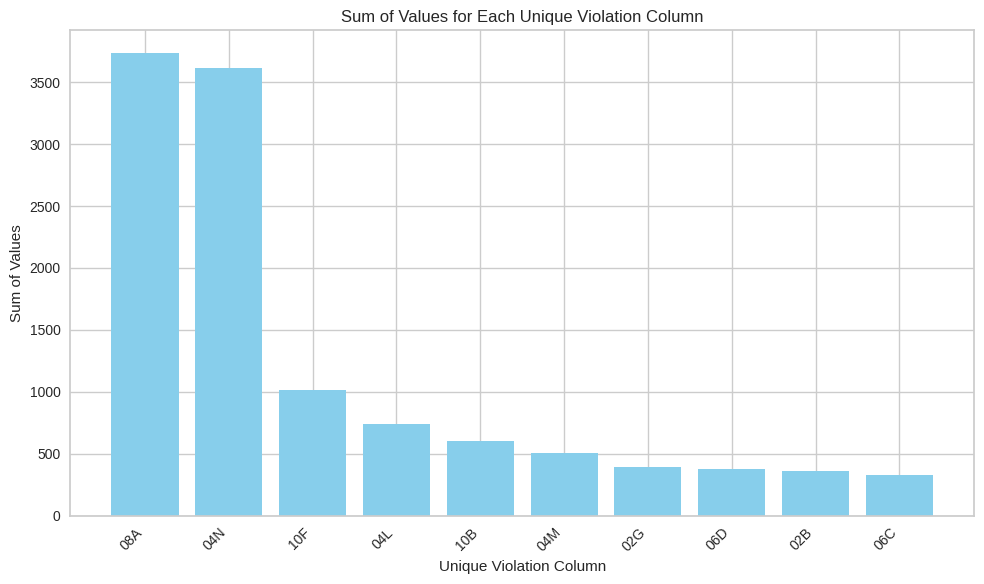

In [194]:
import matplotlib.pyplot as plt

sum_table_sorted = sum_table.sort_values(by='Sum', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(sum_table_sorted.index, sum_table_sorted['Sum'], color='skyblue')
plt.xlabel('Unique Violation Column')
plt.ylabel('Sum of Values')
plt.title('Sum of Values for Each Unique Violation Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# pests, mice, and flies
# 08A: conditions conducive to presence of pests
# 04N: filth flies
# 10F: Non-food contact surfaces (wall, ceiling, floors) improperly constructed/maintained
# 04L: evidence of mice


In [195]:
count_per_year_0 = cluster_0['Year'].value_counts().sort_index(ascending=True)

cumulative_count_0 = count_per_year_0.cumsum()
total_count_0 = cumulative_count_0.max()
cumulative_percentage_0 = cumulative_count_0 / total_count_0 * 100

result_df_0 = pd.DataFrame({'Count': count_per_year_0,'Cumulative Count': cumulative_count_0,'Cumulative Percentage': cumulative_percentage_0})

print("Number of rows per year (ascending order):")
print(result_df_0)

Number of rows per year (ascending order):
      Count  Cumulative Count  Cumulative Percentage
Year                                                
2015      1                 1               0.025491
2016     13                14               0.356870
2017     46                60               1.529442
2018     55               115               2.931430
2019    143               258               6.576600
2020     76               334               8.513892
2021    468               802              20.443538
2022   1500              2302              58.679582
2023   1569              3871              98.674484
2024     52              3923             100.000000


In [196]:
cluster_0 = cluster_0[cluster_0['SCORE'] != 0]

In [197]:
count_per_year_0 = cluster_0['Year'].value_counts().sort_index(ascending=True)

cumulative_count_0 = count_per_year_0.cumsum()
total_count_0 = cumulative_count_0.max()
cumulative_percentage_0 = cumulative_count_0 / total_count_0 * 100

result_df_0 = pd.DataFrame({'Count': count_per_year_0,'Cumulative Count': cumulative_count_0,'Cumulative Percentage': cumulative_percentage_0})

print("Number of rows per year (ascending order):")
print(result_df_0)

Number of rows per year (ascending order):
      Count  Cumulative Count  Cumulative Percentage
Year                                                
2015      1                 1               0.026539
2016     13                14               0.371550
2017     46                60               1.592357
2018     55               115               3.052017
2019    143               258               6.847134
2020     76               334               8.864119
2021    466               800              21.231423
2022   1347              2147              56.979830
2023   1569              3716              98.619958
2024     52              3768             100.000000


In [198]:
filter_test_0 = cluster_0[cluster_0['Year'].isin([2023, 2024])]
filter_train_0 = cluster_0[cluster_0['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_0[unique_violations]
X_test=filter_test_0[unique_violations]
y_train=filter_train_0['SCORE']
y_test=filter_test_0['SCORE']

In [199]:
len(filter_train_0)

2147

In [200]:
import statsmodels.api as sm
import pandas as pd

### Linear

In [201]:
c0_X_train = sm.add_constant(X_train)
c0_X_test = X_test
c0_lin_model = sm.OLS(y_train, c0_X_train)
results = c0_lin_model.fit()
c1_lin_pred_0 = results.predict(c0_X_test)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     225.5
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        04:11:17   Log-Likelihood:                -5994.0
No. Observations:                2147   AIC:                         1.210e+04
Df Residuals:                    2089   BIC:                         1.243e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
10J            0.6165      1.298      0.475      0.6

In [202]:
from sklearn.metrics import mean_absolute_error

y_true = y_test
y_pred = c1_lin_pred_0

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape0 = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape0)

Mean Absolute Percentage Error (MAPE) 14.44410769962533


### Ridge

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [204]:
alphas = 10**np.linspace(-2,5,100)
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 174.7528400007683


In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [206]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)


X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)
ridge.fit(scaler.transform(X_train), y_train)


pu_ridge_prediction = ridge.predict(X_test_scaled)

pu_ridge_mse = round(mean_squared_error(y_test, pu_ridge_prediction), 3)
pu_ridge_mse

21.013

In [207]:
# MAPE VALUE OF RIDGE REGRESSION
y3_true = y_test
y3_pred = pu_ridge_prediction

def mean_absolute_percentage_error(y3_true, y3_pred):
    y3_true, y3_pred = np.array(y3_true), np.array(y3_pred)
    return np.mean(np.abs((y3_true - y3_pred) / y3_true)) * 100

mape3 = mean_absolute_percentage_error(y3_true, y3_pred)
print("Mean Absolute Percentage Error (MAPE)", mape3)

Mean Absolute Percentage Error (MAPE) 13.053246521484546


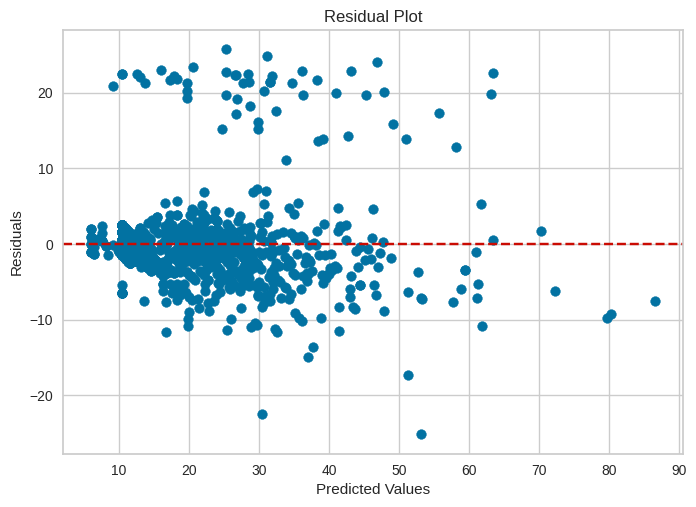

In [208]:
import matplotlib.pyplot as plt

residuals = y_test - pu_ridge_prediction

plt.scatter(pu_ridge_prediction, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

### Lasso

In [209]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
c2_las_pred = lasso_reg.predict(c0_X_test)

In [210]:
y2_true = y_test
y2_pred = c2_las_pred

def mean_absolute_percentage_error(y2_true, y2_pred):
    y2_true, y2_pred = np.array(y2_true), np.array(y2_pred)
    return np.mean(np.abs((y2_true - y2_pred) / y2_true)) * 100

mape2 = mean_absolute_percentage_error(y2_true, y2_pred)
print("Mean Absolute Percentage Error (MAPE)", mape2)

Mean Absolute Percentage Error (MAPE) 34.33072902459307


### Predicting the values

In [211]:
filter_test_0['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
X_train_scaled = scaler.transform(X_train)
filter_train_0['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)

<ipython-input-211-1f958910c644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_test_0['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
<ipython-input-211-1f958910c644>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_train_0['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)


In [212]:
merged_df_0 = pd.concat([filter_test_0, filter_train_0], ignore_index=True)

## __CLUSTER 1__

In [213]:
cluster_1 = combined_data[combined_data['Cluster'] == 1]

In [214]:
sum_of_unique_violations_1 = cluster_1[unique_violations].sum()

sum_table1 = pd.DataFrame(sum_of_unique_violations_1, columns=['Sum'])

sum_table_sorted1 = sum_table1.sort_values(by='Sum', ascending=False)

print(sum_table_sorted1)

# 08A: Conditions conducive to pests
# 04L: evidence of mice
# 10F: Flooring improperly constructed and/or maintained
# 10B: improper disposal of sewage or liquid waste
# 04M: roaches

      Sum
08A  4888
04L  4394
10F  1617
10B   793
04M   704
..    ...
03F     0
22F     0
02F     0
22G     0
04I     0

[69 rows x 1 columns]


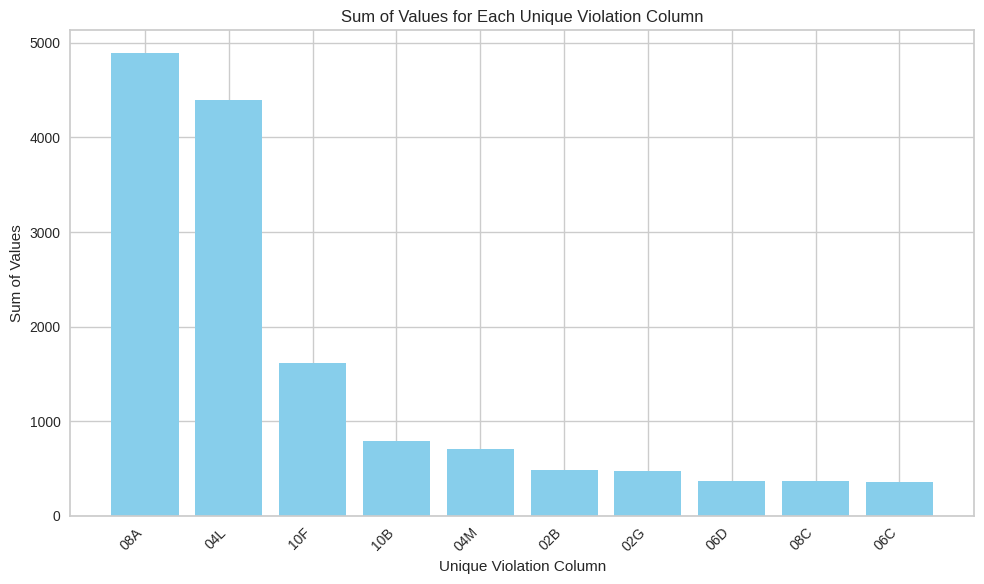

In [215]:
import matplotlib.pyplot as plt

sum_table_sorted1 = sum_table1.sort_values(by='Sum', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(sum_table_sorted1.index, sum_table_sorted1['Sum'], color='skyblue')
plt.xlabel('Unique Violation Column')
plt.ylabel('Sum of Values')
plt.title('Sum of Values for Each Unique Violation Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [216]:
cluster_1 = cluster_1[cluster_1['SCORE'] != 0]

In [217]:
filter_test_1 = cluster_1[cluster_1['Year'].isin([2023, 2024])]
filter_train_1 = cluster_1[cluster_1['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_1[unique_violations]
X_test=filter_test_1[unique_violations]
y_train=filter_train_1['SCORE']
y_test=filter_test_1['SCORE']

### Linear Model

In [218]:
c1_X_train = (X_train)
c1_X_test = sm.add_constant(X_test)
c1_lin_model = sm.OLS(y_train, c1_X_train)
results = c1_lin_model.fit()
c1_lin_pred_1 = results.predict(c1_X_test)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  SCORE   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              1270.
Date:                Fri, 03 May 2024   Prob (F-statistic):                        0.00
Time:                        04:11:22   Log-Likelihood:                         -7713.6
No. Observations:                2907   AIC:                                  1.554e+04
Df Residuals:                    2852   BIC:                                  1.587e+04
Df Model:                          55                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [219]:
from sklearn.metrics import mean_absolute_error

y_true = y_test
y_pred = c1_lin_pred_1

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape)

Mean Absolute Percentage Error (MAPE) 10.031611024532213


### Ridge

In [220]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)


X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)
ridge.fit(scaler.transform(X_train), y_train)


pu_ridge_prediction1 = ridge.predict(X_test_scaled)

pu_ridge_mse_1 = round(mean_squared_error(y_test, pu_ridge_prediction1), 3)
pu_ridge_mse_1

15.423

In [221]:
# MAPE VALUE OF RIDGE REGRESSION
y_true = y_test
y_pred = pu_ridge_prediction1

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape)

Mean Absolute Percentage Error (MAPE) 8.983840974341819


### Lasso

In [222]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
c2_las_pred = lasso_reg.predict(c1_X_test)

In [223]:
y2_true = y_test
y2_pred = c2_las_pred

def mean_absolute_percentage_error(y2_true, y2_pred):
    y2_true, y2_pred = np.array(y2_true), np.array(y2_pred)
    return np.mean(np.abs((y2_true - y2_pred) / y2_true)) * 100

mape2 = mean_absolute_percentage_error(y2_true, y2_pred)
print("Mean Absolute Percentage Error (MAPE)", mape2)

Mean Absolute Percentage Error (MAPE) 35.390142977049635


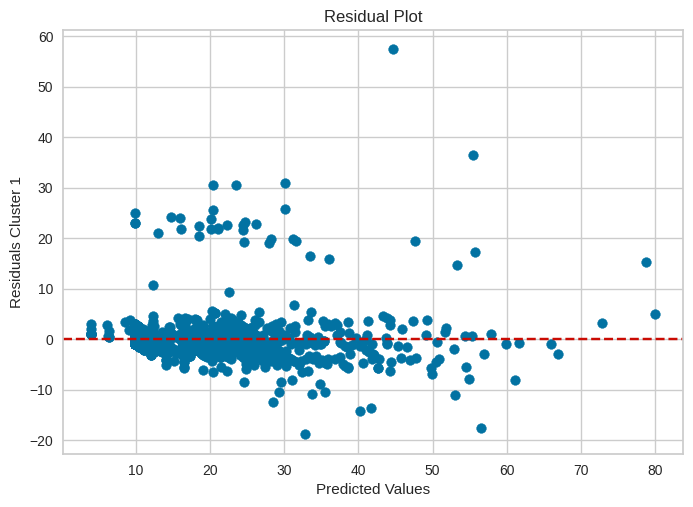

In [224]:
import matplotlib.pyplot as plt

residuals = y_test - pu_ridge_prediction1

plt.scatter(pu_ridge_prediction1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals Cluster 1')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

### Predicting the values

In [225]:
filter_test_1['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
X_train_scaled = scaler.transform(X_train)
filter_train_1['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)

<ipython-input-225-b3f309590e39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_test_1['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
<ipython-input-225-b3f309590e39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_train_1['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)


In [226]:
merged_df_1 = pd.concat([filter_test_1, filter_train_1], ignore_index=True)
merged_df_1.head(3)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,30075445-20230822,A,12.0,2023-08-22,30075445,MORRIS PARK BAKE SHOP,40.848231,-73.855972,0,0,...,0,0,0,0,0,0,2023,1,Test,12.176476
1,40361618-20230426,A,13.0,2023-04-26,40361618,SAL'S DELI,40.781674,-73.839416,0,0,...,0,0,0,0,0,0,2023,1,Test,12.762796
2,40364439-20230517,A,12.0,2023-05-17,40364439,SEVILLA RESTAURANT,40.734908,-74.002973,0,0,...,0,0,0,0,0,0,2023,1,Test,12.420498


In [227]:
import statsmodels.api as sm
import pandas as pd

## __CLUSTER_2__

In [228]:
cluster_2 = combined_data[combined_data['Cluster'] == 2]

In [229]:
sum_of_unique_violations_2 = cluster_2[unique_violations].sum()

sum_table2 = pd.DataFrame(sum_of_unique_violations_2, columns=['Sum'])

sum_table_sorted2 = sum_table2.sort_values(by='Sum', ascending=False)

print(sum_table_sorted2)

# 06D: Food contact surface not sanitized; and/or not clean to sight and/or touch
# 06C: lack of food protection when displayed/stored/overall protection
# 10B: Improper disposal of sewage or liquid waste
# 02B: Hot potentially hazardous food not held at 140°F or above
# 02G: Cold potentially hazardous food not held at 41°F or below

      Sum
06D  3222
06C  2588
10B  2268
02B  2206
02G  1924
..    ...
03F     0
03D     0
10F     0
22F     0
04I     0

[69 rows x 1 columns]


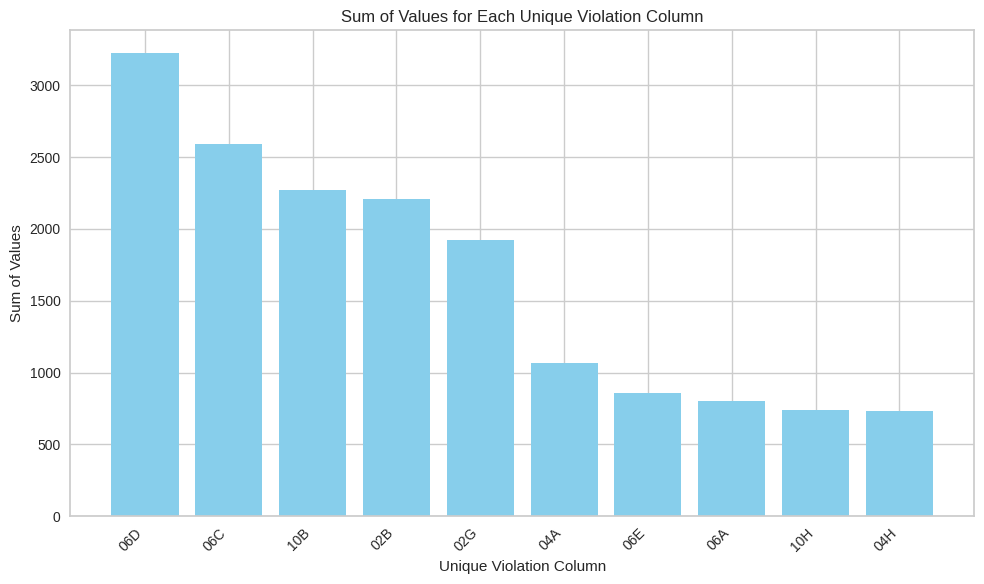

In [230]:
sum_table_sorted2 = sum_table2.sort_values(by='Sum', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(sum_table_sorted2.index, sum_table_sorted2['Sum'], color='skyblue')
plt.xlabel('Unique Violation Column')
plt.ylabel('Sum of Values')
plt.title('Sum of Values for Each Unique Violation Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [231]:
cluster_2 = cluster_2[cluster_2['SCORE'] != 0]

In [232]:
filter_test_2 = cluster_2[cluster_2['Year'].isin([2023, 2024])]
filter_train_2 = cluster_2[cluster_2['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_2[unique_violations]
X_test=filter_test_2[unique_violations]
y_train=filter_train_2['SCORE']
y_test=filter_test_2['SCORE']

### Linear Model

In [233]:
c2_X_train = sm.add_constant(X_train)
c2_X_test = sm.add_constant(X_test)
c2_lin_model = sm.OLS(y_train, c2_X_train)
results = c2_lin_model.fit()
c1_lin_pred_2 = results.predict(c2_X_test)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1429.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        04:11:25   Log-Likelihood:                -12194.
No. Observations:                7210   AIC:                         2.451e+04
Df Residuals:                    7148   BIC:                         2.494e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1647      0.042      3.918      0.0

In [234]:
from sklearn.metrics import mean_absolute_error

y_true = y_test
y_pred = c1_lin_pred_2

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_2 = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape_2)

Mean Absolute Percentage Error (MAPE) 8.008667546565515


### Ridge

In [235]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)


X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)
ridge.fit(scaler.transform(X_train), y_train)


pu_ridge_prediction2 = ridge.predict(X_test_scaled)

pu_ridge_mse_2 = round(mean_squared_error(y_test, pu_ridge_prediction2), 3)
pu_ridge_mse_2

3.129

In [236]:
# MAPE VALUE OF RIDGE REGRESSION
y_true = y_test
y_pred = pu_ridge_prediction2

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape)

Mean Absolute Percentage Error (MAPE) 8.015449052270975


### Lasso

In [237]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a pipeline to add the constant column and scale the features
pipeline = Pipeline([
    ('add_constant', ColumnTransformer([('const', 'passthrough', [0])], remainder='passthrough')),
    ('scaler', StandardScaler())
])

# Fit the pipeline and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)

# Transform the test data using the fitted pipeline
X_test_scaled = pipeline.transform(X_test)

# Fit the Lasso regression model
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_scaled, y_train)

# Predict using the test data
c2_las_pred = lasso_reg.predict(X_test_scaled)

In [238]:
y2_true = y_test
y2_pred = c2_las_pred

def mean_absolute_percentage_error(y2_true, y2_pred):
    y2_true, y2_pred = np.array(y2_true), np.array(y2_pred)
    return np.mean(np.abs((y2_true - y2_pred) / y2_true)) * 100

mape2 = mean_absolute_percentage_error(y2_true, y2_pred)
print("Mean Absolute Percentage Error (MAPE)", mape2)

Mean Absolute Percentage Error (MAPE) 47.20515056287573


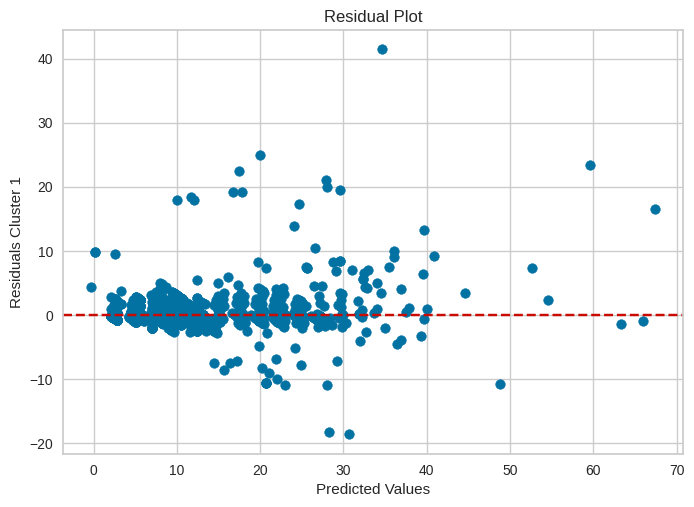

In [239]:
import matplotlib.pyplot as plt

residuals = y_test - pu_ridge_prediction2

plt.scatter(pu_ridge_prediction2, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals Cluster 1')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

### Predicting the values

In [240]:
filter_test_2['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
X_train_scaled = scaler.transform(X_train)
filter_train_2['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)
merged_df_2 = pd.concat([filter_test_2, filter_train_2], ignore_index=True)
merged_df_2.head(3)

<ipython-input-240-189f2c1a51c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_test_2['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
<ipython-input-240-189f2c1a51c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_train_2['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)


,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,30112340-20230721,A,9.0,2023-07-21,30112340,WENDY'S,40.662652,-73.962081,0,0,...,0,0,0,0,0,0,2023,2,Test,7.766087
1,30191841-20230423,A,10.0,2023-04-23,30191841,DJ REYNOLDS PUB AND RESTAURANT,40.767326,-73.984310,0,0,...,0,0,0,0,0,0,2023,2,Test,10.745189
2,40359705-20230426,A,13.0,2023-04-26,40359705,NATHAN'S FAMOUS,40.575537,-73.981652,0,0,...,0,0,0,0,0,0,2023,2,Test,9.963883


## CLUSTER 3

In [241]:
cluster_3 = combined_data[combined_data['Cluster'] == 3]


In [242]:
sum_of_unique_violations_3 = cluster_3[unique_violations].sum().head(10)
sum_table3 = pd.DataFrame(sum_of_unique_violations_3, columns=['Sum'])
sum_table_sorted3 = sum_table3.sort_values(by='Sum', ascending=False)
print(sum_table_sorted3)

      Sum
02B  1426
09C   927
04A   645
06F   540
09B   402
04M   156
09E   143
10J    77
10C    44
02I    23


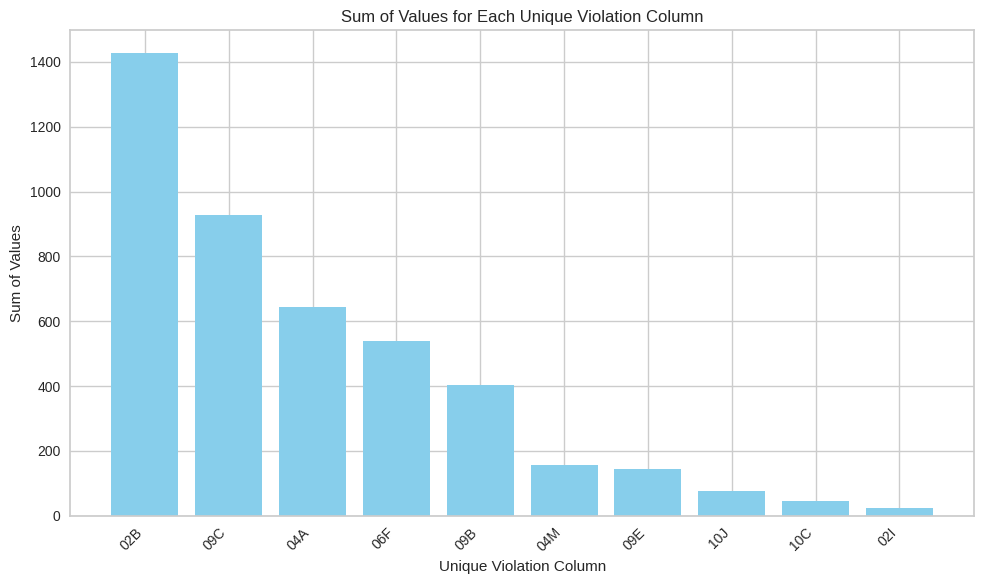

In [243]:
sum_table_sorted3 = sum_table3.sort_values(by='Sum', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(sum_table_sorted3.index, sum_table_sorted3['Sum'], color='skyblue')
plt.xlabel('Unique Violation Column')
plt.ylabel('Sum of Values')
plt.title('Sum of Values for Each Unique Violation Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 02B: Hot potentially hazardous food not held at 140°F or above
# 09C: Food contact surface improperly constructed and maintained; not easily cleanable
# 04A: Food Protection Certificate not held by supervisor or manager of food operations
# 06F: Wiping cloth improperly stored and/or sanitized

In [244]:
cluster_3 = cluster_3[cluster_3['SCORE'] != 0]

In [245]:
filter_test_3 = cluster_3[cluster_3['Year'].isin([2023, 2024])]
filter_train_3 = cluster_3[cluster_3['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_3[unique_violations]
X_test=filter_test_3[unique_violations]
y_train=filter_train_3['SCORE']
y_test=filter_test_3['SCORE']

### Linear Model

In [246]:
c3_X_train = sm.add_constant(X_train)
c3_X_test = sm.add_constant(X_test)
c3_lin_model = sm.OLS(y_train, c3_X_train)
results = c3_lin_model.fit()
c1_lin_pred_3 = results.predict(c3_X_test)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1923.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        04:11:29   Log-Likelihood:                -15095.
No. Observations:                9000   AIC:                         3.031e+04
Df Residuals:                    8939   BIC:                         3.075e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
10J            2.0072      0.150     13.371      0.0

In [247]:
from sklearn.metrics import mean_absolute_error

y_true = y_test
y_pred = c1_lin_pred_3

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_3 = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape_3)

Mean Absolute Percentage Error (MAPE) 14.263867576661097


### Ridge

In [248]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)


X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)
ridge.fit(scaler.transform(X_train), y_train)


pu_ridge_prediction3 = ridge.predict(X_test_scaled)

pu_ridge_mse_3 = round(mean_squared_error(y_test, pu_ridge_prediction3), 3)
pu_ridge_mse_3

3.243

In [249]:
# MAPE VALUE OF RIDGE REGRESSION
y3_true = y_test
y3_pred = pu_ridge_prediction3

def mean_absolute_percentage_error(y3_true, y3_pred):
    y3_true, y3_pred = np.array(y3_true), np.array(y3_pred)
    return np.mean(np.abs((y3_true - y3_pred) / y3_true)) * 100

mape3 = mean_absolute_percentage_error(y3_true, y3_pred)
print("Mean Absolute Percentage Error (MAPE)", mape3)

Mean Absolute Percentage Error (MAPE) 14.266585525856051


### Lasso

In [250]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
c2_las_pred = lasso_reg.predict(c3_X_test)

In [251]:
y2_true = y_test
y2_pred = c2_las_pred

def mean_absolute_percentage_error(y2_true, y2_pred):
    y2_true, y2_pred = np.array(y2_true), np.array(y2_pred)
    return np.mean(np.abs((y2_true - y2_pred) / y2_true)) * 100

mape2 = mean_absolute_percentage_error(y2_true, y2_pred)
print("Mean Absolute Percentage Error (MAPE)", mape2)
# MAPE: 49.908

Mean Absolute Percentage Error (MAPE) 69.86651602634905


### Predicting the values

In [252]:
linear_model = LinearRegression()
X_train_scaled = scaler.transform(X_train)
linear_model.fit(X_train_scaled, y_train)
filter_test_3['PREDICTED_SCORE'] = linear_model.predict(X_test_scaled)
filter_train_3['PREDICTED_SCORE'] = linear_model.predict(X_train_scaled)
merged_df_3 = pd.concat([filter_test_3, filter_train_3], ignore_index=True)

<ipython-input-252-41e5119c3247>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_test_3['PREDICTED_SCORE'] = linear_model.predict(X_test_scaled)
<ipython-input-252-41e5119c3247>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_train_3['PREDICTED_SCORE'] = linear_model.predict(X_train_scaled)


## Merging the Cluster Datasets

In [253]:
merged_df_final = pd.concat([merged_df_0,merged_df_1, merged_df_2,merged_df_3], ignore_index=True)
merged_df_final

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,40356731-20230117,A,9.0,2023-01-17,40356731,TASTE THE TROPICS ICE CREAM,40.640795,-73.948488,0,0,...,0,0,0,0,0,0,2023,0,Test,10.985034
1,40367241-20231027,A,10.0,2023-10-27,40367241,JG MELON RESTAURANT,40.771192,-73.959532,0,0,...,0,0,0,0,0,0,2023,0,Test,10.487235
2,40369418-20230829,A,13.0,2023-08-29,40369418,CAFFE REGGIO,40.730207,-74.000318,0,0,...,0,0,0,0,0,0,2023,0,Test,13.018596
3,40369667-20231108,A,10.0,2023-11-08,40369667,WHITE CASTLE,40.663491,-73.932265,0,0,...,0,0,0,0,0,0,2023,0,Test,10.836167
4,40369782-20230809,A,12.0,2023-08-09,40369782,MCDONALD'S,40.656181,-73.930845,0,0,...,0,0,0,0,0,0,2023,0,Test,12.593113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36879,50130435-20221220,A,13.0,2022-12-20,50130435,SKY COFFEE SHOP,40.708099,-73.911158,0,0,...,0,0,0,0,0,0,2022,3,Training,13.009723
36880,50130476-20221227,A,4.0,2022-12-27,50130476,QUEUE.BEER,40.674016,-73.998133,0,0,...,0,0,0,0,0,0,2022,3,Training,2.816700
36881,50130520-20221229,A,7.0,2022-12-29,50130520,SHAKE SHACK NEW YORK,40.609929,-73.922282,0,0,...,0,0,0,0,0,0,2022,3,Training,7.876093
36882,50130539-20221229,A,2.0,2022-12-29,50130539,STARBUCKS COFFEE COMPANY,40.639998,-73.918272,0,0,...,0,0,0,0,0,0,2022,3,Training,2.816700


merged_df_final.to_csv('merged_final_1.csv')

In [254]:
merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36884 entries, 0 to 36883
Columns: 180 entries, KEY to PREDICTED_SCORE
dtypes: datetime64[ns](1), float64(4), int32(1), int64(170), object(4)
memory usage: 50.5+ MB


### Data Aggregation

In [255]:
merged_df_final['ID RESTAURANT'] = merged_df_final['KEY'].apply(lambda x: x.split('-')[0])

key_index = merged_df_final.columns.get_loc('KEY')
merged_df_final.insert(key_index + 1, 'ID RESTAURANT', merged_df_final.pop('ID RESTAURANT'))



In [256]:
import pandas as pd

# Calculate year weights
weights = {
    2024: 2,
    2023: 1,
    2022: 0.5,
    2021: 0.25,
    2020: 0.125,
    2019: 0.0625,
    2018: 0.03125,
    2017: 0.015625,
    2016: 0.0078125,
    2015: 0.00390625
}

# Convert 'INSPECTION DATE' to datetime if not already
merged_df_final['INSPECTION DATE'] = pd.to_datetime(merged_df_final['INSPECTION DATE'])

# Calculate year from 'INSPECTION DATE'
merged_df_final['Year'] = merged_df_final['INSPECTION DATE'].dt.year

# Group by 'ID RESTAURANT'
grouped = merged_df_final.groupby('ID RESTAURANT')

# Define function to calculate weighted exponential smoothing average
def weighted_ema(group):
    group['Weighted Score'] = group['PREDICTED_SCORE'] * group['Year'].map(weights)
    weighted_sum = group['Weighted Score'].sum()
    weights_sum = group['Year'].map(weights).sum()
    group['Exponential Smoothed Score'] = weighted_sum / weights_sum
    return group.iloc[0]  # return the first row of the group

# Apply exponential smoothing average
aggregated_df = grouped.apply(weighted_ema)

# Drop the redundant 'Year' and 'Weighted Score' columns
aggregated_df.drop(columns=['Year', 'Weighted Score','INSPECTION DATE'], inplace=True)

# Reset index to flatten the DataFrame
aggregated_df.reset_index(drop=True, inplace=True)

# Display the aggregated DataFrame
print(aggregated_df)


                     KEY ID RESTAURANT GRADE  SCORE     CAMIS  \
0      30075445-20230822      30075445     A   12.0  30075445   
1      30112340-20210805      30112340     B   16.0  30112340   
2      30191841-20230423      30191841     A   10.0  30191841   
3      40356018-20220201      40356018     A    7.0  40356018   
4      40356483-20220124      40356483     A    9.0  40356483   
...                  ...           ...   ...    ...       ...   
23241  50145229-20240122      50145229     A    5.0  50145229   
23242  50145309-20240118      50145309     A    5.0  50145309   
23243  50145781-20240123      50145781     A   11.0  50145781   
23244  50145823-20240105      50145823     A   11.0  50145823   
23245  50145855-20240122      50145855     A   10.0  50145855   

                                  DBA   Latitude  Longitude  02A  02B  ...  \
0               MORRIS PARK BAKE SHOP  40.848231 -73.855972    0    0  ...   
1                             WENDY'S  40.662652 -73.962081    

In [257]:
max_score = aggregated_df['Exponential Smoothed Score'].max()

aggregated_df['Probabilistic risk Score'] = (aggregated_df['Exponential Smoothed Score'] / max_score) * 100

print(aggregated_df)


                     KEY ID RESTAURANT GRADE  SCORE     CAMIS  \
0      30075445-20230822      30075445     A   12.0  30075445   
1      30112340-20210805      30112340     B   16.0  30112340   
2      30191841-20230423      30191841     A   10.0  30191841   
3      40356018-20220201      40356018     A    7.0  40356018   
4      40356483-20220124      40356483     A    9.0  40356483   
...                  ...           ...   ...    ...       ...   
23241  50145229-20240122      50145229     A    5.0  50145229   
23242  50145309-20240118      50145309     A    5.0  50145309   
23243  50145781-20240123      50145781     A   11.0  50145781   
23244  50145823-20240105      50145823     A   11.0  50145823   
23245  50145855-20240122      50145855     A   10.0  50145855   

                                  DBA   Latitude  Longitude  02A  02B  ...  \
0               MORRIS PARK BAKE SHOP  40.848231 -73.855972    0    0  ...   
1                             WENDY'S  40.662652 -73.962081    

In [258]:
aggregated_df.to_csv('Dataset_aggregated_rev01.csv')

In [259]:
selected_columns = ['ID RESTAURANT', 'GRADE', 'DBA','Latitude','Longitude','Exponential Smoothed Score','Probabilistic risk Score']

In [260]:
output_1 = aggregated_df[selected_columns].copy()
output_1.head(2)

,ID RESTAURANT,GRADE,DBA,Latitude,Longitude,Exponential Smoothed Score,Probabilistic risk Score
0,30075445,A,MORRIS PARK BAKE SHOP,40.848231,-73.855972,10.802323,12.361325
1,30112340,B,WENDY'S,40.662652,-73.962081,10.221990,11.697238


In [261]:
output_1['ID RESTAURANT'] = output_1['ID RESTAURANT'].astype(int)

In [262]:
output_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23246 entries, 0 to 23245
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID RESTAURANT               23246 non-null  int64  
 1   GRADE                       23246 non-null  object 
 2   DBA                         23246 non-null  object 
 3   Latitude                    23194 non-null  float64
 4   Longitude                   23194 non-null  float64
 5   Exponential Smoothed Score  23246 non-null  float64
 6   Probabilistic risk Score    23246 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [263]:
final_df.head(2)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Southwestern,Spanish,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year
0,30075445-20210810,A,5.0,2021-08-10,30075445,MORRIS PARK BAKE SHOP,40.848231,-73.855972,0,0,...,0,0,0,0,0,0,0,0,0,2021
1,30075445-20230822,A,12.0,2023-08-22,30075445,MORRIS PARK BAKE SHOP,40.848231,-73.855972,0,0,...,0,0,0,0,0,0,0,0,0,2023


In [264]:
print(final_df['INSPECTION DATE'].dtype)


datetime64[ns]


In [265]:
recent_data = final_df.groupby('CAMIS')['INSPECTION DATE'].idxmax()

filtered_final_df = final_df.loc[recent_data]

print(filtered_final_df)

                     KEY GRADE  SCORE INSPECTION DATE     CAMIS  \
1      30075445-20230822     A   12.0      2023-08-22  30075445   
4      30112340-20230721     A    9.0      2023-07-21  30112340   
6      30191841-20230423     A   10.0      2023-04-23  30191841   
8      40356018-20220201     A    7.0      2022-02-01  40356018   
10     40356483-20220819     A    2.0      2022-08-19  40356483   
...                  ...   ...    ...             ...       ...   
37429  50145229-20240122     A    5.0      2024-01-22  50145229   
37430  50145309-20240118     A    5.0      2024-01-18  50145309   
37431  50145781-20240123     A   11.0      2024-01-23  50145781   
37432  50145823-20240105     A   11.0      2024-01-05  50145823   
37433  50145855-20240122     A   10.0      2024-01-22  50145855   

                                  DBA   Latitude  Longitude  02A  02B  ...  \
1               MORRIS PARK BAKE SHOP  40.848231 -73.855972    0    0  ...   
4                             WENDY'S  

In [266]:
X=filtered_final_df[unique_violations]

# Second Round of Clustering

This second round of clusteting is necessary to obtain the final cluster value for each restaurant. The first set of clusters were created to help predict the values of each INSPECTION for every restaurant. Now, for the purpose of our dashboard, we will cluster each restaurant based on their most recent inspection, and the cluster value assigned will be reflected in the dashboard.

In [267]:
def calculate_median(X):
    return np.median(X, axis=0)

def median_distance(X, medians):
    return np.linalg.norm(X - medians, ord=1, axis=1)

def kmedians_fit(X, n_clusters, random_state=0, max_iter=300):
    kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=random_state, max_iter=max_iter)
    kmeans.fit(X)

    # Calculate the median for each cluster
    cluster_medians = []
    for i in range(n_clusters):
        cluster_data = X[kmeans.labels_ == i]
        median = calculate_median(cluster_data)
        cluster_medians.append(median)

    # Assign cluster labels to each data point
    final_cluster = kmeans.labels_

    # Return the cluster labels and medians
    return final_cluster, np.array(cluster_medians)

# Assuming 'filtered_final_df' is your DataFrame and 'X' is your data

# Call kmedians_fit to obtain cluster labels and medians
final_cluster, _ = kmedians_fit(X, n_clusters=4)  # Adjust n_clusters as needed

# Assign the cluster labels to the DataFrame
filtered_final_df['Final Cluster'] = final_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [268]:
filtered_final_df.head(2)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Spanish,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Final Cluster
1,30075445-20230822,A,12.0,2023-08-22,30075445,MORRIS PARK BAKE SHOP,40.848231,-73.855972,0,0,...,0,0,0,0,0,0,0,0,2023,0
4,30112340-20230721,A,9.0,2023-07-21,30112340,WENDY'S,40.662652,-73.962081,0,0,...,0,0,0,0,0,0,0,0,2023,2


In [269]:
filtered_final_df.rename(columns={'CAMIS': 'ID RESTAURANT'}, inplace=True)

In [270]:
### Now we will add the columns'CLUSTER' from the filtered_final_df to the datafram output_1

In [271]:
output_merged = output_1.merge(filtered_final_df[['ID RESTAURANT', 'Final Cluster']], on='ID RESTAURANT', how='left')
output_merged.head(2)

,ID RESTAURANT,GRADE,DBA,Latitude,Longitude,Exponential Smoothed Score,Probabilistic risk Score,Final Cluster
0,30075445,A,MORRIS PARK BAKE SHOP,40.848231,-73.855972,10.802323,12.361325,0
1,30112340,B,WENDY'S,40.662652,-73.962081,10.221990,11.697238,2


In [272]:
output_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23246 entries, 0 to 23245
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID RESTAURANT               23246 non-null  int64  
 1   GRADE                       23246 non-null  object 
 2   DBA                         23246 non-null  object 
 3   Latitude                    23194 non-null  float64
 4   Longitude                   23194 non-null  float64
 5   Exponential Smoothed Score  23246 non-null  float64
 6   Probabilistic risk Score    23246 non-null  float64
 7   Final Cluster               23246 non-null  int32  
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 1.3+ MB


In [273]:
# Now we include additional feature such as Cuisine type ,

In [274]:
unique_cuisine_per_camis = mydf.groupby('CAMIS')['CUISINE DESCRIPTION'].unique().reset_index()
unique_cuisine_per_camis['CUISINE DESCRIPTION'] = unique_cuisine_per_camis['CUISINE DESCRIPTION'].apply(lambda x: ', '.join(x))
unique_cuisine_per_camis.rename(columns={'CAMIS': 'ID RESTAURANT'}, inplace=True)
unique_cuisine_per_camis.head(2)

,ID RESTAURANT,CUISINE DESCRIPTION
0,30075445,Bakery Products/Desserts
1,30112340,Hamburgers


In [275]:
unique_cuisine_per_camis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23354 entries, 0 to 23353
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID RESTAURANT        23354 non-null  int64 
 1   CUISINE DESCRIPTION  23354 non-null  object
dtypes: int64(1), object(1)
memory usage: 365.0+ KB


In [276]:
output_merged_2 = output_merged.merge(unique_cuisine_per_camis[['ID RESTAURANT', 'CUISINE DESCRIPTION']], on='ID RESTAURANT', how='left')
output_merged_2.head(2)

,ID RESTAURANT,GRADE,DBA,Latitude,Longitude,Exponential Smoothed Score,Probabilistic risk Score,Final Cluster,CUISINE DESCRIPTION
0,30075445,A,MORRIS PARK BAKE SHOP,40.848231,-73.855972,10.802323,12.361325,0,Bakery Products/Desserts
1,30112340,B,WENDY'S,40.662652,-73.962081,10.221990,11.697238,2,Hamburgers


## Final Dataset for Dashboard

In [277]:
output_merged_2.to_csv('Output_NYC_1.CSV')

In [278]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



X = final_df[unique_violations]
y = final_df['SCORE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the scores on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('\nFeature Importances:')
feature_importances.head(8)

Mean Squared Error: 19.678385056395438

Feature Importances:


,Feature,Importance
19,08A,0.158288
20,02G,0.115404
2,02B,0.091178
9,04A,0.076085
30,05D,0.059926
16,06C,0.052817
14,06D,0.044026
29,04H,0.030428


In [279]:
feature_importances.head(12)

,Feature,Importance
19,08A,0.158288
20,02G,0.115404
2,02B,0.091178
9,04A,0.076085
30,05D,0.059926
16,06C,0.052817
14,06D,0.044026
29,04H,0.030428
43,05H,0.029137
17,10F,0.025113
